In [8]:
import math

def get_area_x_y_value(nodes):
    return math.sqrt(((100**2)/20) * nodes)

print(get_area_x_y_value(10))
print(get_area_x_y_value(20))
print(get_area_x_y_value(30))
print(get_area_x_y_value(40))
print(get_area_x_y_value(50))

70.71067811865476
100.0
122.47448713915891
141.4213562373095
158.11388300841898


In [48]:
from numpy import arange
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def get_ranking_logs(log_file,exp="quantidade"):
    path = f"experimentos/{exp}/logs/{log_file}"
    df = pd.read_csv(path, delimiter="\t", header=None)
    df.columns = ["time", "id", "message"]
    substring_to_find = "[WARN: RPL       ]"
    data = df[df['message'].str.startswith(substring_to_find)]

    data['message'] = data['message'].str.replace(substring_to_find, "").str.strip()
    data['id'] = data['id'].str.replace("ID:","")
    data['id'] = data['id'].astype(int)

    return data[
        data['message'].str.startswith("found parent")
        | data['message'].str.startswith("significant rank update")
    ]

def get_nodes_last_rank_logs(data):
    data['time'] = pd.to_datetime(data['time'], format='%M:%S.%f')
    data = data.sort_values(by='time', ascending=False)
    result = data.groupby('id').head(1)
    result = result.sort_values(by='time')
    result['time'] = result['time'].dt.strftime('%H:%M.%f')

    return result


def last_rank_logs(log_file,exp="quantidade"):
    data = get_ranking_logs(log_file,exp)
    return get_nodes_last_rank_logs(data)

get_ranking_logs("n10.txt")

,time,id,message
106,00:12.688,7,"found parent: fe80::201:1:1:1, staying in DAG"
111,00:18.388,8,"found parent: fe80::201:1:1:1, staying in DAG"
112,00:19.498,10,"found parent: fe80::201:1:1:1, staying in DAG"
123,00:27.088,9,"found parent: fe80::201:1:1:1, staying in DAG"
137,00:38.968,5,"found parent: fe80::201:1:1:1, staying in DAG"
140,00:41.308,3,"found parent: fe80::209:9:9:9, staying in DAG"
145,00:45.808,4,"found parent: fe80::207:7:7:7, staying in DAG"
148,00:52.018,6,"found parent: fe80::201:1:1:1, staying in DAG"
153,01:22.138,2,"found parent: fe80::208:8:8:8, staying in DAG"


In [3]:
last_rank_logs('n10.txt')


,time,id,message
106,00:00.688000,7,"found parent: fe80::201:1:1:1, staying in DAG"
111,00:00.388000,8,"found parent: fe80::201:1:1:1, staying in DAG"
112,00:00.498000,10,"found parent: fe80::201:1:1:1, staying in DAG"
123,00:00.088000,9,"found parent: fe80::201:1:1:1, staying in DAG"
137,00:00.968000,5,"found parent: fe80::201:1:1:1, staying in DAG"
140,00:00.308000,3,"found parent: fe80::209:9:9:9, staying in DAG"
145,00:00.808000,4,"found parent: fe80::207:7:7:7, staying in DAG"
148,00:00.018000,6,"found parent: fe80::201:1:1:1, staying in DAG"
153,00:01.138000,2,"found parent: fe80::208:8:8:8, staying in DAG"


In [4]:
last_rank_logs('n20.txt')

,time,id,message
211,00:00.588000,16,"found parent: fe80::201:1:1:1, staying in DAG"
221,00:00.318000,13,"found parent: fe80::201:1:1:1, staying in DAG"
227,00:00.318000,17,"found parent: fe80::201:1:1:1, staying in DAG"
261,00:00.668000,8,"found parent: fe80::20d:d:d:d, staying in DAG"
269,00:00.008000,11,"found parent: fe80::20d:d:d:d, staying in DAG"
276,00:00.648000,9,"found parent: fe80::211:11:11:11, staying in DAG"
290,00:00.188000,20,"found parent: fe80::210:10:10:10, staying in DAG"
292,00:00.358000,14,"found parent: fe80::210:10:10:10, staying in DAG"
295,00:00.988000,15,"found parent: fe80::211:11:11:11, staying in DAG"
299,00:00.008000,12,"found parent: fe80::210:10:10:10, staying in DAG"


In [5]:
last_rank_logs('n30.txt')

,time,id,message
316,00:00.928000,25,"found parent: fe80::201:1:1:1, staying in DAG"
335,00:00.688000,26,"found parent: fe80::201:1:1:1, staying in DAG"
336,00:00.838000,29,"found parent: fe80::201:1:1:1, staying in DAG"
399,00:00.368000,30,"found parent: fe80::201:1:1:1, staying in DAG"
402,00:00.818000,24,"found parent: fe80::21a:1a:1a:1a, staying in DAG"
445,00:00.908000,21,"found parent: fe80::201:1:1:1, staying in DAG"
446,00:00.938000,28,"found parent: fe80::21d:1d:1d:1d, staying in DAG"
471,00:00.738000,16,"found parent: fe80::21a:1a:1a:1a, staying in DAG"
486,00:00.788000,20,"found parent: fe80::21a:1a:1a:1a, staying in DAG"
495,00:00.498000,27,"found parent: fe80::21c:1c:1c:1c, staying in DAG"


In [6]:
last_rank_logs('n40.txt')

,time,id,message
2099,00:05.688000,39,"found parent: fe80::201:1:1:1, staying in DAG"
2176,00:05.708000,38,"found parent: fe80::227:27:27:27, staying in DAG"
2185,00:05.638000,36,"found parent: fe80::201:1:1:1, staying in DAG"
2245,00:05.428000,40,"found parent: fe80::227:27:27:27, staying in DAG"
2272,00:05.688000,34,"found parent: fe80::227:27:27:27, staying in DAG"
2290,00:05.687000,28,"found parent: fe80::228:28:28:28, staying in DAG"
2295,00:05.078000,37,"found parent: fe80::224:24:24:24, staying in DAG"
2312,00:05.568000,33,"found parent: fe80::227:27:27:27, staying in DAG"
2331,00:05.717000,22,"found parent: fe80::21c:1c:1c:1c, staying in DAG"
2334,00:05.748000,29,significant rank update 1002->402


In [7]:
last_rank_logs('n50.txt')

,time,id,message
5198,00:10.018000,7,significant rank update 945->1490
10684,00:20.628000,8,"found parent: fe80::216:16:16:16, staying in DAG"
12991,00:25.956000,15,"found parent: fe80::20d:d:d:d, staying in DAG"
16716,00:31.277000,22,"found parent: fe80::214:14:14:14, staying in DAG"
16842,00:31.456000,36,"found parent: fe80::223:23:23:23, staying in DAG"
16893,00:31.598000,4,"found parent: fe80::20b:b:b:b, staying in DAG"
16953,00:31.218000,6,"found parent: fe80::214:14:14:14, staying in DAG"
17158,00:32.377000,50,significant rank update 1252->1813
17785,00:33.478000,30,"found parent: fe80::22c:2c:2c:2c, staying in DAG"
18464,00:35.848000,20,"found parent: fe80::213:13:13:13, staying in DAG"


In [68]:
def barplot(
    data, x, y, y_range, color=None, title=None, y_tick_interval=None, figsize=None
):
    sns.set()
    sns.barplot(
        data=data,
        x=x,
        y=y,
        hue=color,
    ).set(ylim=y_range)

    plt.title(title or f"{y} em função do {x}", y=1.05)

    if y_tick_interval:
        # Create a list of tick positions at the specified interval
        y_ticks = arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval)

        plt.gca().set_yticks(y_ticks)

    plt.show()


def linePlot(
    data,
    x,
    y,
    y_range,
    color=None,
    markers="o",
    title=None,
    y_tick_interval=None,
    figsize=None,
):
    if figsize:
        plt.figure(figsize=(figsize[0], figsize[1]))

    sns.set()
    sns.lineplot(
        data=data,
        x=x,
        y=y,
        marker=markers,
        hue=color,
    ).set(title=title or f"{y} em função do {x}", ylim=y_range)

    if y_tick_interval:
        # Create a list of tick positions at the specified interval
        y_ticks = arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval)

        plt.gca().set_yticks(y_ticks)

    plt.show()

# quantidade

In [33]:
log_files = ["n10.txt", "n20.txt", "n30.txt", "n40.txt", "n50.txt"]

stabilized_rpl_times = []

for log_file in log_files:
    data = last_rank_logs(log_file)
    stabilized_rpl_times.append(
        {
            "número de nós": log_file.replace(".txt", "").replace("n", ""),
            "tempo registrado (minutos)": data.iloc[-1]["time"],
        }
    )

stabilized_rpl_times = pd.DataFrame(stabilized_rpl_times)
stabilized_rpl_times["tempo registrado (minutos)"] = (
    pd.to_datetime(stabilized_rpl_times["tempo registrado (minutos)"], format="%M:%S.%f").dt.minute * 60
    + pd.to_datetime(stabilized_rpl_times["tempo registrado (minutos)"], format="%M:%S.%f").dt.second
    + pd.to_datetime(stabilized_rpl_times["tempo registrado (minutos)"], format="%M:%S.%f").dt.microsecond
    / 1e6
)
stabilized_rpl_times

,número de nós,tempo registrado (minutos)
0,10,1.138
1,20,1.858
2,30,1.898
3,40,9.067
4,50,37.378


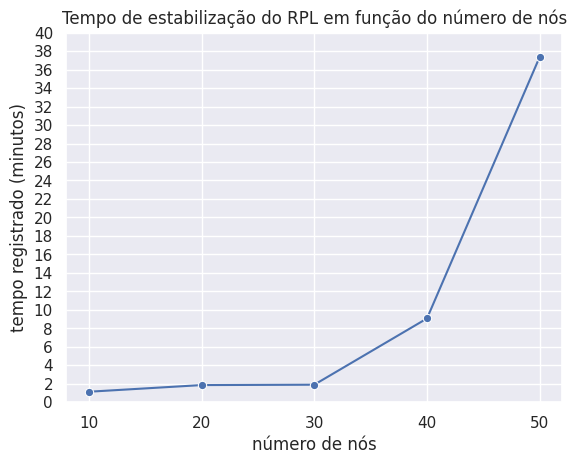

In [45]:


linePlot(
    data=stabilized_rpl_times,
    x="número de nós",
    y="tempo registrado (minutos)",
    y_range=[0,40],
    y_tick_interval=2,
    title="Tempo de estabilização do RPL em função do número de nós"
)


# densidade

In [53]:
log_files = ["space_200.txt", "space_100.txt", "space_50.txt"]

stabilized_rpl_times = []

for log_file in log_files:
    data = last_rank_logs(log_file, exp="densidade")
    stabilized_rpl_times.append(
        {
            "área": int(log_file.replace(".txt", "").replace("space_",""))**2,
            "tempo registrado (minutos)": data.iloc[-1]["time"],
        }
    )

stabilized_rpl_times = pd.DataFrame(stabilized_rpl_times)
stabilized_rpl_times["tempo registrado (minutos)"] = (
    pd.to_datetime(stabilized_rpl_times["tempo registrado (minutos)"], format="%M:%S.%f").dt.minute * 60
    + pd.to_datetime(stabilized_rpl_times["tempo registrado (minutos)"], format="%M:%S.%f").dt.second
    + pd.to_datetime(stabilized_rpl_times["tempo registrado (minutos)"], format="%M:%S.%f").dt.microsecond
    / 1e6
)
stabilized_rpl_times

,área,tempo registrado (minutos)
0,40000,3.088
1,10000,22.058
2,2500,45.827


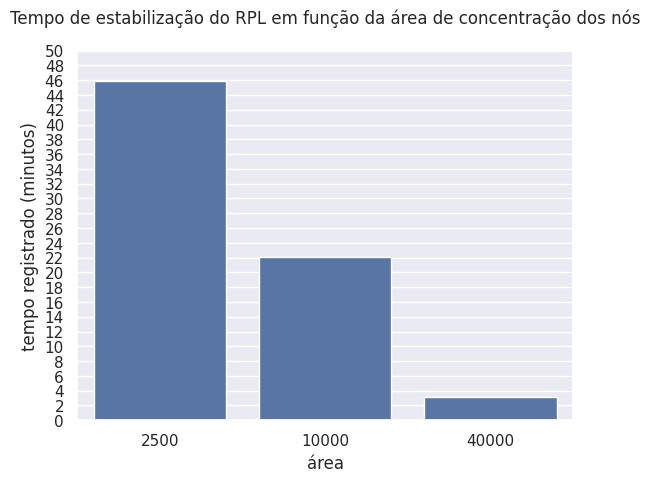

In [86]:
barplot(
    data=stabilized_rpl_times,
    x="área",
    y="tempo registrado (minutos)",
    y_range=[0, 50],
    y_tick_interval=2,
    title="Tempo de estabilização do RPL em função da área de concentração dos nós",
)

